In [1]:
from merge_sort import merge_sort
from insertion_sort import insertion_sort

import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import matplotlib.pyplot as plt

from copy import copy
from tqdm import tqdm
import time
import random  

random.seed(4444)

In [2]:
data = []

# iterate through values of n from hypothesis (0 < n < 100)
# use tqdm because i get anxious when i cant see the progress
for n in tqdm(range(1, 100)):
    # generate uniformly-distributed random lists of length n
    # with values between 0 and 1000
    rand_list = random.sample(range(1000), n)
    
    merge_measures = []
    insertion_measures = []
    
    # measure 7 times and keep the minimum value
    # this accounts for possible effects of other 
    # system processes
    for _ in range(7):
        merge_time = 0
        insertion_time = 0

        # we use process_time since it accounts for sleep
        # https://stackoverflow.com/a/52228375
        a = time.process_time_ns()
        # sample 10000 times
        for _ in range(10000):
            merge_list = copy(rand_list)
            merge_sort(merge_list)
        b = time.process_time_ns()

        merge_time += b - a

        # sample 10000 times
        a = time.process_time_ns()
        for _ in range(10000):
            insertion_list = copy(rand_list)
            insertion_sort(insertion_list)
        b = time.process_time_ns()

        insertion_time += b - a
        
        merge_measures.append(merge_time)
        insertion_measures.append(insertion_time)
        
    # store minimum value across measurements
    data.append({
        'n': n,
        'merge_sort_time': min(merge_measures),
        'insertion_sort_time': min(insertion_measures)
    })
        
df = pd.DataFrame(data)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [10:52<00:00,  6.59s/it]


In [3]:
# fit merge_sort against n log n regression using least squares
# adapted from https://stackoverflow.com/a/3433503
merge_sort_params, _ = scipy.optimize.curve_fit(lambda t, a, b: a + b * t * np.log(t), df['n'], df['merge_sort_time'])

In [4]:
# fit insertion_sort to a 2nd degree polynomial
insertion_sort_params = np.polyfit(df['n'], df['insertion_sort_time'], 2)

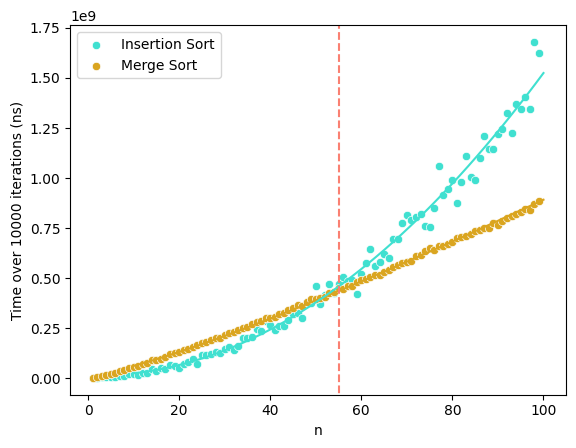

In [5]:
sns.scatterplot(df, x='n', y='insertion_sort_time', color='turquoise', label='Insertion Sort')
sns.scatterplot(df, x='n', y='merge_sort_time', color='goldenrod', label='Merge Sort')

# draw merge_sort fit
t = np.linspace(10, 100)
y = merge_sort_params[0] + merge_sort_params[1] * t * np.log(t)
sns.lineplot(x=t, y=y, color='goldenrod')

# draw insertion_sort fit
y = insertion_sort_params[0] * t**2 + insertion_sort_params[1] * t + insertion_sort_params[2]
sns.lineplot(x=t, y=y, color='turquoise')

plt.xlabel("n")
plt.ylabel("Time over 10000 iterations (ns)")

# approximatge intersection manually and graph it
plt.axvline(55, 10, 0, color='salmon', ls='--')

In [6]:
! python --version

Python 3.8.13


In [7]:
merge_sort_params

array([18245590.31708282,  1896817.76566505])

In [8]:
insertion_sort_params

array([  156107.99193385,  -509936.49827012, 14228481.96928273])